# NetworkX API basics

In [63]:
#import networkx API
import networkx as nx

#initialize and empty graph
G = nx.Graph()

#add 1, 2 ,3 as nodes
G.add_nodes_from([1,2,3])

# see what nodes are present in the graph
G.nodes()

NodeView((1, 2, 3))

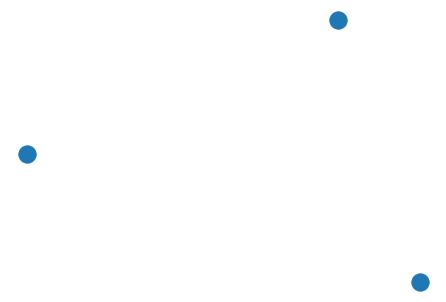

In [64]:
# Draw node link diagram graph
nx.draw(G)
import matplotlib.pyplot as plt
plt.show()

In [57]:
type(G)

networkx.classes.graph.Graph

In [58]:
#initialize and empty directed graph
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [61]:
#initialize and empty multi-edge(Directed) graph
M = nx.MultiGraph()
MD = nx.MultiDiGraph()
print(type(M))
print(type(MD))

<class 'networkx.classes.multigraph.MultiGraph'>
<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [65]:
#add an edge between the nodes 1 and 2
G.add_edge(1,2)

# view a list of tuples which represent the edges in which each tuple shows the nodes that are present on that edge.
G.edges()

EdgeView([(1, 2)])

In [6]:
# storing metadata in the graph
G.nodes[1]['label'] = 'blue'
G.nodes[2]['label'] = 'green'
G.nodes[3]['label'] = 'red'

# see what nodes are present in the graph with metadata
G.nodes(data = True)

NodeDataView({1: {'label': 'blue'}, 2: {'label': 'green'}, 3: {'label': 'red'}})

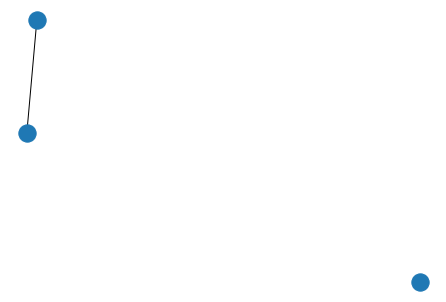

In [4]:
# Draw node link diagram graph
nx.draw(G)
import matplotlib.pyplot as plt
plt.show()

In [12]:
# find length of the graph
len(G.nodes)
# find the data structure
type(G.nodes())
# the data structure of the third element of the last edge listed in
list(G.edges(data=True))[-1]

(1, 2, {})

# Checking whether there are self-loops in the graph

In [ ]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# # Check whether number of self loops equals the number of nodes in self loops
# assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

## Task 1
Write a full graph of 20 nodes where from each node, there is a link to one to six other nodes, taken at random, of your choice. Use a labelling of your choice to label each node of the network.

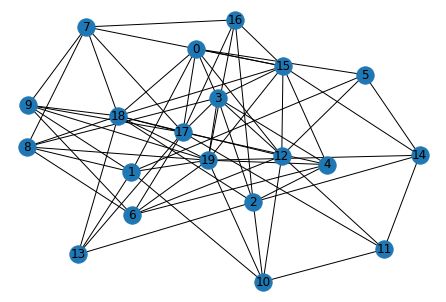

In [42]:
import random

#initialize an empty graph
G_1 = nx.Graph()

# Add 20 nodes with random labels
for i in range(20):
    G_1.add_node(i, label='Node {}'.format(i))

# Add random edges to each node
for node in G_1.nodes():
    num_edges = random.randint(1, 6)  # choose random number of edges
    for i in range(num_edges):
        neighbor = random.choice(list(G_1.nodes()))  # choose random neighbor
        while neighbor == node or G_1.has_edge(node, neighbor):
            neighbor = random.choice(list(G_1.nodes()))  # avoid self-loops and duplicates
        G_1.add_edge(node, neighbor)

# #add 20 nodes with metadata
# #G_1.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
# G.add_nodes_from([
#     (1, {"label": "one"}),
#     (2, {"label": "two"}),
#     (3, {"label": "three"}),
#     (4, {"label": "four"}),
#     (5, {"label": "five"}),
#     (6, {"label": "six"}),
#     (7, {"label": "seven"}),
#     (8, {"label": "eight"}),
#     (9, {"label": "nine"}),
#     (10, {"label": "ten"}),
#     (11, {"label": "eleven"}),
#     (12, {"label": "twelve"}),
#     (13, {"label": "thirteen"}),
#     (14, {"label": "forteen"}),
#     (15, {"label": "fifteen"}),
#     (16, {"label": "sixteen"}),
#     (17, {"label": "seventeen"}),
#     (18, {"label": "eightteen"}),
#     (19, {"label": "nineteen"}),
#     (20, {"label": "twenty"}),
# ])

# #link one to six other nodes at random
# G_1.add_edge(1,2)
# G_1.add_edge(1,8)
# G_1.add_edge(1,9)
# G_1.add_edge(1,15)
# G_1.add_edge(1,18)
# G_1.add_edge(1,20)

# # Adding a list of edges 
# G_1.add_edges_from([(2,3),(2,8),(2,11),(2,14),(2,17),(2,19)])

# Draw node link diagram graph
nx.draw(G_1, with_labels = True)
import matplotlib.pyplot as plt
plt.show()



In [68]:
G_1.nodes(data=True)

NodeDataView({0: {'label': 'Node 0'}, 1: {'label': 'Node 1'}, 2: {'label': 'Node 2'}, 3: {'label': 'Node 3'}, 4: {'label': 'Node 4'}, 5: {'label': 'Node 5'}, 6: {'label': 'Node 6'}, 7: {'label': 'Node 7'}, 8: {'label': 'Node 8'}, 9: {'label': 'Node 9'}, 10: {'label': 'Node 10'}, 11: {'label': 'Node 11'}, 12: {'label': 'Node 12'}, 13: {'label': 'Node 13'}, 14: {'label': 'Node 14'}, 15: {'label': 'Node 15'}, 16: {'label': 'Node 16'}, 17: {'label': 'Node 17'}, 18: {'label': 'Node 18'}, 19: {'label': 'Node 19'}})

## Adjacency matrix

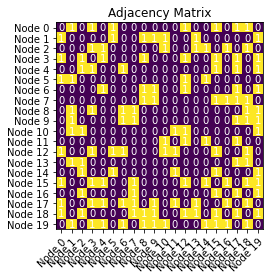

In [46]:
import numpy as np
# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(G_1).todense()

# Create a dictionary of node labels
node_labels = {i: G_1.nodes[i]['label'] for i in range(len(G_1.nodes()))}

# Draw the matrix plot with node labels
fig, ax = plt.subplots()
im = ax.imshow(adj_matrix)

# Add tick labels
ax.set_xticks(np.arange(len(G_1.nodes())))
ax.set_yticks(np.arange(len(G_1.nodes())))
ax.set_xticklabels([node_labels[i] for i in range(len(G_1.nodes()))])
ax.set_yticklabels([node_labels[i] for i in range(len(G_1.nodes()))])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations
for i in range(len(G_1.nodes())):
    for j in range(len(G_1.nodes())):
        text = ax.text(j, i, adj_matrix[i, j], ha="center", va="center", color="w")

# Set title and show the plot
ax.set_title("Adjacency Matrix")
fig.tight_layout()
plt.show()

#### Calculate the degree of each node and the average degree of the graph  (use appropriate functions in  NetworkX) and display their values

In [50]:
G_1.degree()

DegreeView({0: 7, 1: 7, 2: 7, 3: 8, 4: 6, 5: 4, 6: 6, 7: 6, 8: 6, 9: 6, 10: 5, 11: 4, 12: 8, 13: 4, 14: 5, 15: 9, 16: 5, 17: 10, 18: 10, 19: 11})

In [49]:
# Calculate the degree of each node
node_degrees = dict(G_1.degree())
for node, degree in node_degrees.items():
    print("{}: {}".format(G_1.nodes[node]['label'], degree))

# Calculate the average degree of the graph
avg_degree = nx.average_degree_connectivity(G_1)
print("Average degree: {}".format(avg_degree))

Node 0: 7
Node 1: 7
Node 2: 7
Node 3: 8
Node 4: 6
Node 5: 4
Node 6: 6
Node 7: 6
Node 8: 6
Node 9: 6
Node 10: 5
Node 11: 4
Node 12: 8
Node 13: 4
Node 14: 5
Node 15: 9
Node 16: 5
Node 17: 10
Node 18: 10
Node 19: 11
Average degree: {7: 6.761904761904762, 8: 7.3125, 6: 8.066666666666666, 4: 7.416666666666667, 5: 7.666666666666667, 9: 7.333333333333333, 10: 6.8, 11: 6.636363636363637}


In [45]:
len(G_1.adj)

20

In [41]:
# add Node attributes
G_1.nodes[1]['title'] = 'Red'
G_1.nodes[2]['title'] = 'Blue'
G_1.nodes[3]['title'] = 'Green'


G_1.nodes(data = True)

NodeDataView({1: {'title': 'Red'}, 2: {'title': 'Blue'}, 8: {}, 9: {}, 15: {}, 18: {}, 20: {}, 3: {'title': 'Green'}, 11: {}, 14: {}, 17: {}, 19: {}})

### Queries on a graph (example)
#Use a list comprehension to get the nodes of interest: noi'  
noi = [n for n, d in T.nodes(data = True) if d['occupation'] == 'scientist']


#Use a list comprehension to get the edges of interest: eoi'  
eoi = [(u, v) for u, v, d in T.edges(data =True) if d['date'] < date(2010, 1, 1)]

# Task 2

In [1]:
import pickle
# Open the file for reading
with open('karate_club_coords.pkl', 'rb') as f:
    # Load the object from the file
    my_object = pickle.load(f, encoding='latin1')
# Use the object as needed
print(my_object)

{'24': array([257.87969408, 318.49368742]), '25': array([446.11750059,  73.11363804]), '26': array([490.53962023, 151.34941744]), '27': array([310.9937593 , 316.88400474]), '20': array([231.27467138, 268.3554436 ]), '21': array([446.60109522, 386.22347982]), '22': array([411.12965804,  53.253833  ]), '23': array([500.        , 269.52685069]), '28': array([472.79527229, 110.9020759 ]), '29': array([149.03975494, 446.03988462]), '1': array([ 69.97107594, 159.0111701 ]), '3': array([157.90050621,   4.23543315]), '2': array([ 96.8218241 , 237.14728561]), '5': array([ 22.29884097, 325.62733401]), '4': array([121.2112242, 275.3350923]), '7': array([125.53235717,  25.74222818]), '6': array([152.65129782, 154.80775364]), '9': array([ 61.083021  , 394.28922573]), '8': array([208.45409923, 139.01263619]), '11': array([  4.99817603, 197.83222394]), '10': array([271.622609  , 400.39798242]), '13': array([183.36024879, 250.69609714]), '12': array([ 23.49922324, 146.13161611]), '15': array([351.3978